<h4 align="center">
LIMPIEZA Y MODIFICACION DE DATOS
</h4>

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

#Leemos el dataset original
df = pd.read_csv('data/matriculaciones_educacion_escolar_basica_2020.csv')

#Eliminamos una columna que no posee datos
df = df.drop(columns='anho_cod_geo')


#Renombrar nombre de las columnas
df = df.rename(columns={
    'anio':'año', 'nombre_departamento':'departamento', 'nombre_distrito': 'distrito', 
    'nombre_zona': 'zona', 'nombre_barrio_localidad': 'localidad', 'nombre_institucion': 'institucion', 
    'sector_o_tipo_gestion': 'sector'
})


#Indexacion y ordenamiento
df = df.set_index('departamento')
df = df.sort_values(['departamento', 'distrito', 'localidad'])


#Limpieza de la columna 'nombre_barrio_localidad' ('localidad') y 'codigo_barrio_localidad'
df.loc[
    (df['localidad'] == 'LOCALIDAD DE CONFIRMAR') 
    | (df['localidad'] == 'LOCALIDAD A CONFIRMAR') 
    | (df['localidad'] == 'LOCALIDAD A  CONFIRMAR'), 'localidad'
] = 'LOCALIDAD A CONFIRMAR'

df.loc[df['localidad'] == 'LOCALIDAD A CONFIRMAR', 'codigo_barrio_localidad'] = '0'

#Agregamos una nueva columna
df['total_matriculados'] = df['total_matriculados_hombre'] + df['total_matriculados_mujer']

<h5>OBJETIVO 1:</h6>
Visualizar gráficamente la distribución de matriculados en la educación escolar básica por departamento.

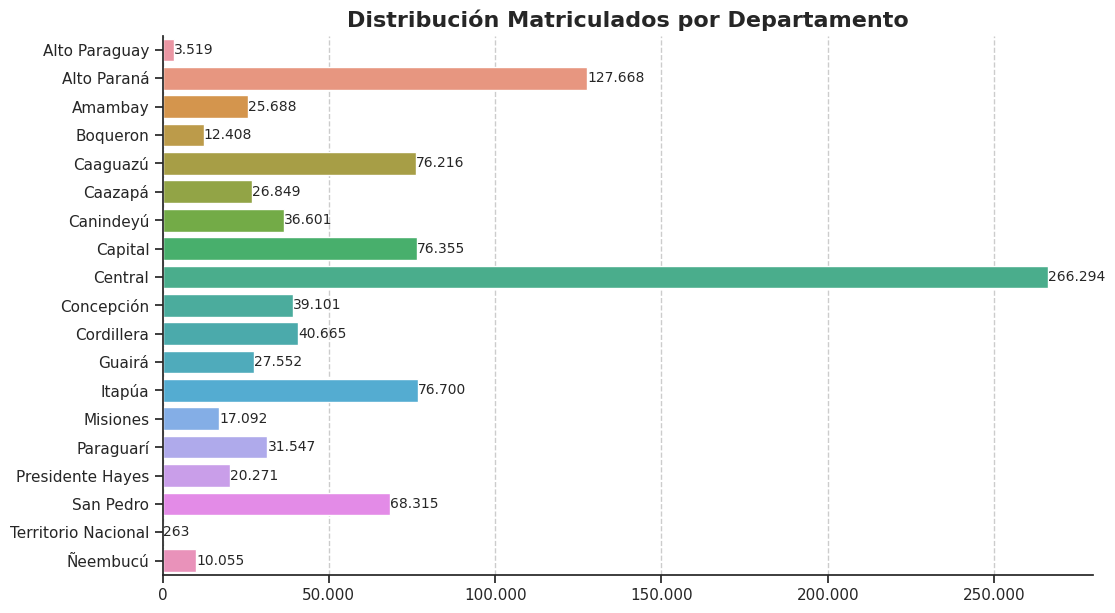

In [11]:
general_format = {'figure.figsize':(12, 7), 'grid.linestyle': '--', 'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', rc = general_format)

#Agrupamos por departamento y obtenemos el total de matriculados
df_departamento = df.groupby(['departamento']).agg({'total_matriculados':'sum'})

#Exportamos a csv
df_departamento.to_csv('data/resumen_departamento_total.csv', encoding = 'utf-8-sig')

df_departamento = df_departamento.reset_index()

# Establecemos la sesión como no-interactiva.
plt.ioff()

# Diagramamos el gráfico de barras.
ax = sns.barplot(y = 'departamento', x = 'total_matriculados', data = df_departamento, errorbar = None)
ax.bar_label(ax.containers[0], fontsize = 10, labels = [f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues])

# Formatemos los labels del eje x
xlabels = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(xlabels))
ax.set_xticklabels([f'{x:,.0f}'.replace(',', '.') for x in xlabels]) 

# Cambios visuales
ax.set(xlabel = None, ylabel = None)
ax.axes.set_title('Distribución Matriculados por Departamento', fontsize = 16, weight = 'bold')
ax.grid(visible = True)
ax.yaxis.grid(False)

# Mostramos el gráfico.
plt.show()

<h5>OBJETIVO 2: (EDE)</h6>
Representar la distribución de matriculados en la educación escolar básica por distrito.

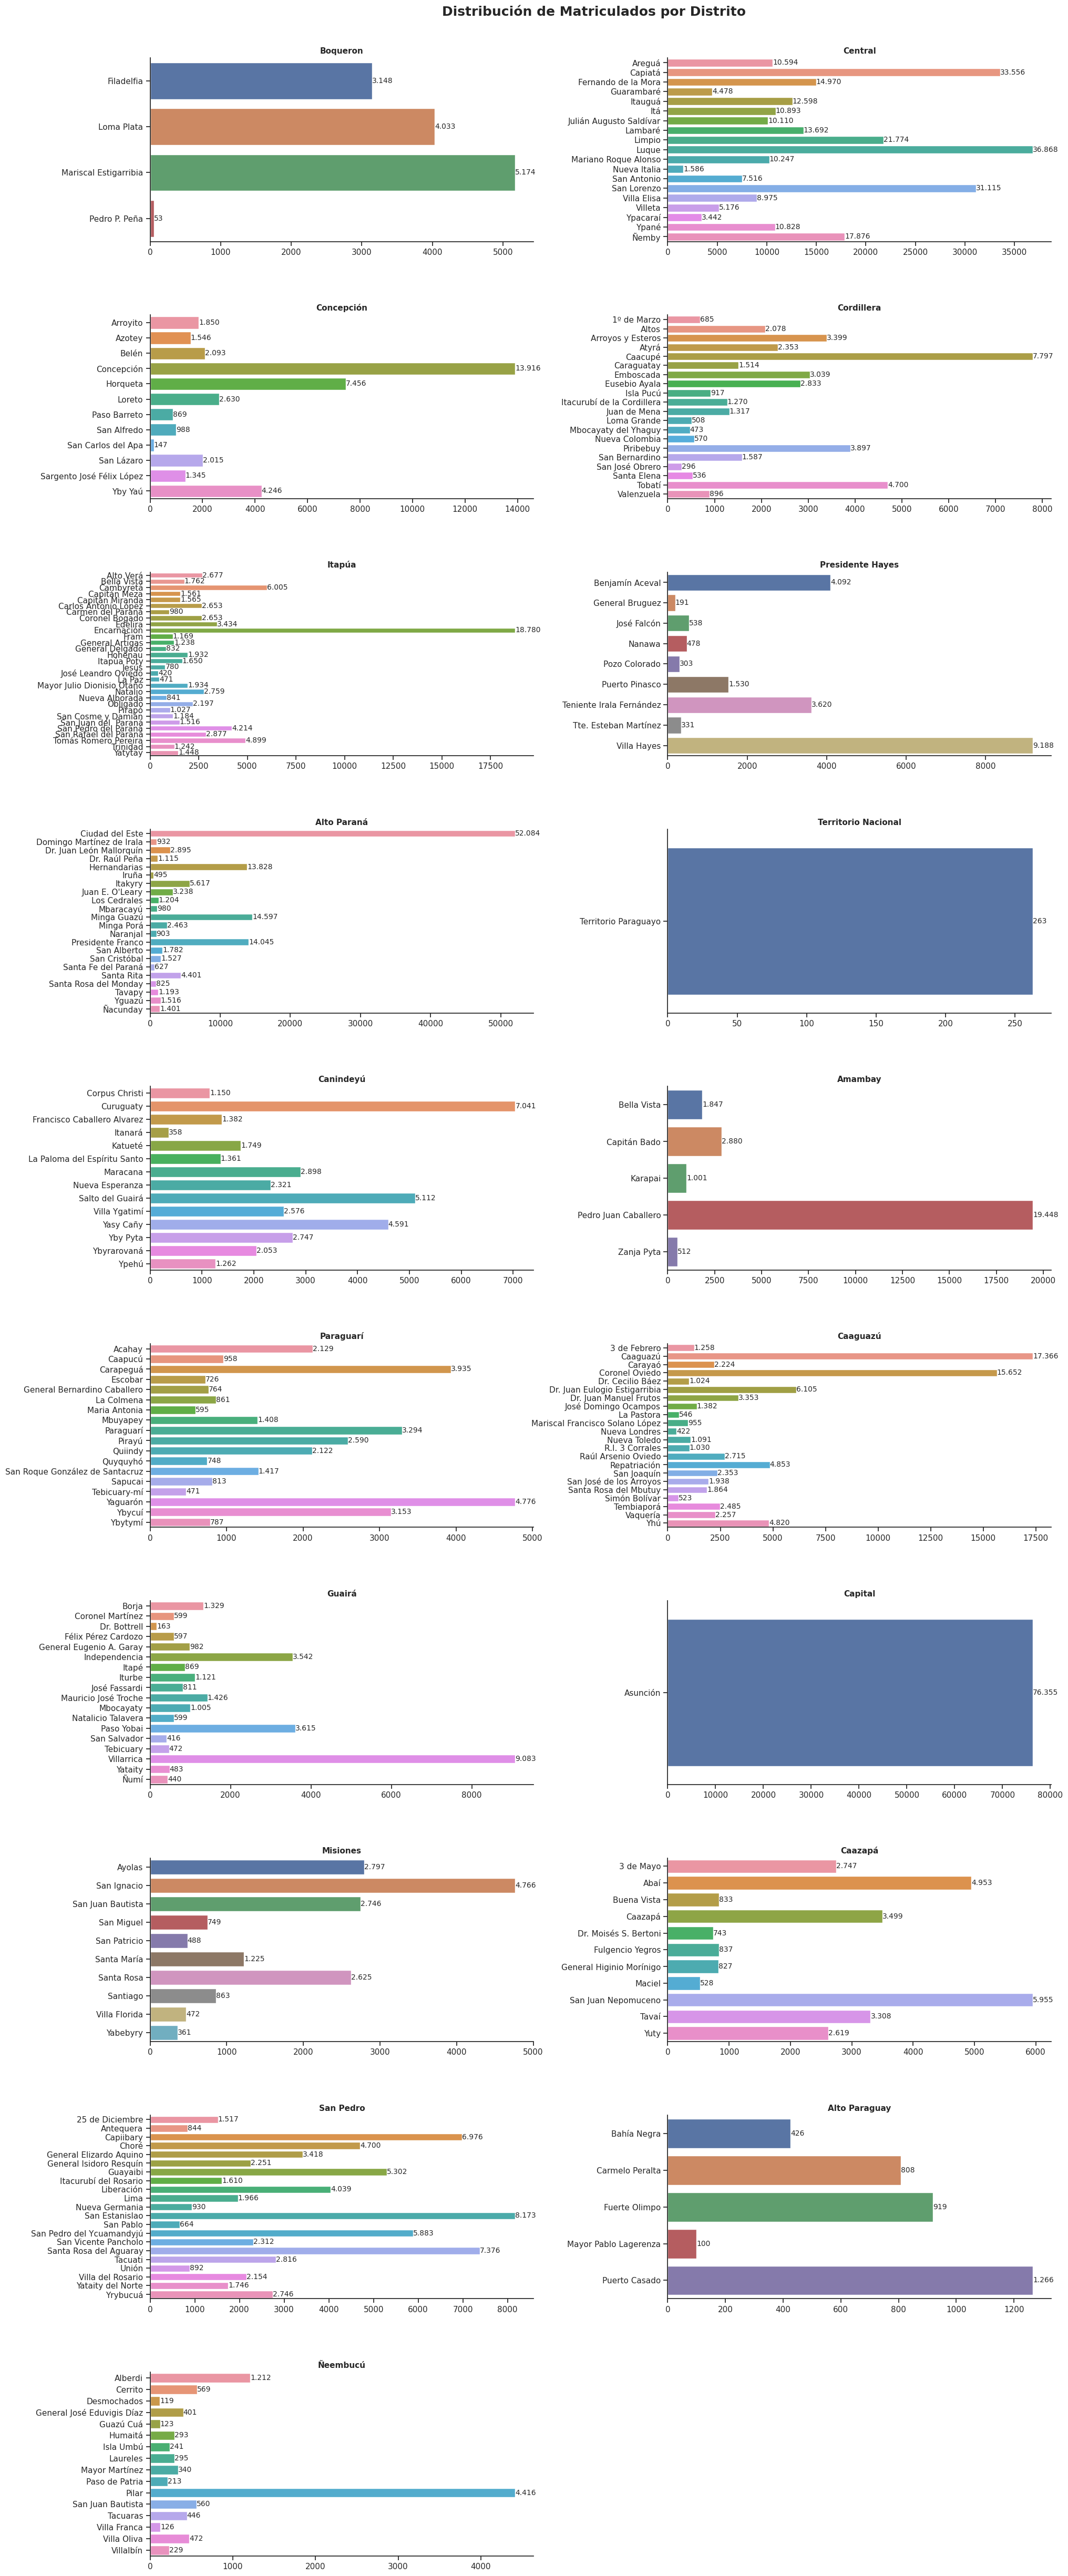

In [155]:
#Agrupamos por departamento y distrito, obtenemos el total de matriculados
df_distrito = df.groupby(['departamento', 'distrito']).agg({'total_matriculados':'sum'})


#Exportamos a csv
df_distrito.to_csv('data/resumen_distrito_total.csv', encoding = 'utf-8-sig')

#Quitamos la columna 'distrito' del indice
df_distrito = df_distrito.reset_index(level=1)


# Establecemos la sesión como no-interactiva.
plt.ioff()


# Definimos los subplots con la cantidad total de departamentos que tenemos de nuestros datos
cantidad_filas = 10
cantidad_columnas = 2
fig, axes = plt.subplots(cantidad_filas, cantidad_columnas, figsize=(18,50))

# Configuraciones de espaciados y ajustes visuales de los graficos
fig.tight_layout()
fig.subplots_adjust(top=0.96, wspace=0.35, hspace=0.4)


# Eliminamos el ultimo subgrafico
fig.delaxes(axes[cantidad_filas - 1][cantidad_columnas - 1])

# Definimos el titulo general del los graficos
plt.suptitle('Distribución de Matriculados por Distrito', fontsize = 18, fontweight='bold', verticalalignment='top')


# Obtenemos la lista de departamentos
lista_departamentos = list(set(df_distrito.index))


indice_departamentos = 0

# Cargamos cada uno de los subgraficos con los datos de los distintos distritos
for i in range(cantidad_filas):
    for j in range(cantidad_columnas):
        if indice_departamentos > len(lista_departamentos) - 1:
            break
        
        # Obtenemos los datos de los distritos y la cantidad de matriculados en ese distrito, de acuerdo al departamento correspondiente
        datos_distrito = df_distrito.loc[lista_departamentos[indice_departamentos]]

        # Para el caso de 'Territorio Nacional' y 'Capital' que tiene 1 solo distrito, retorna una serie, entonces transformamos para poder utilizarlo en el grafico
        if isinstance(datos_distrito, pd.Series):
            datos_distrito = datos_distrito.to_frame().transpose()
            
        datos_distrito = datos_distrito.reset_index()

        # Cargamos el subgrafico con los datos del departamento
        sns.barplot(x='total_matriculados', y='distrito', data = datos_distrito, ax = axes[i][j])
        axes[i][j].set_title(lista_departamentos[indice_departamentos], fontdict= { 'fontsize': 11, 'fontweight':'bold'})
        axes[i][j].bar_label(axes[i][j].containers[0], fontsize = 10, labels = [f'{x:,.0f}'.replace(',', '.') for x in axes[i][j].containers[0].datavalues])
        axes[i][j].set_ylabel(None) 
        axes[i][j].set_xlabel(None)

        indice_departamentos = indice_departamentos + 1



# Mostramos el gráfico.
plt.show()



<h5>OBJETIVO 3: (RICH)</h6>
Plasmar gráficamente la distribución de matriculados en la educación escolar básica por localidad.

<h5>OBJETIVO 4: (RICH)</h6>
Reflejar mediante un gráfico la distribución de matriculados en la educación escolar básica por género.

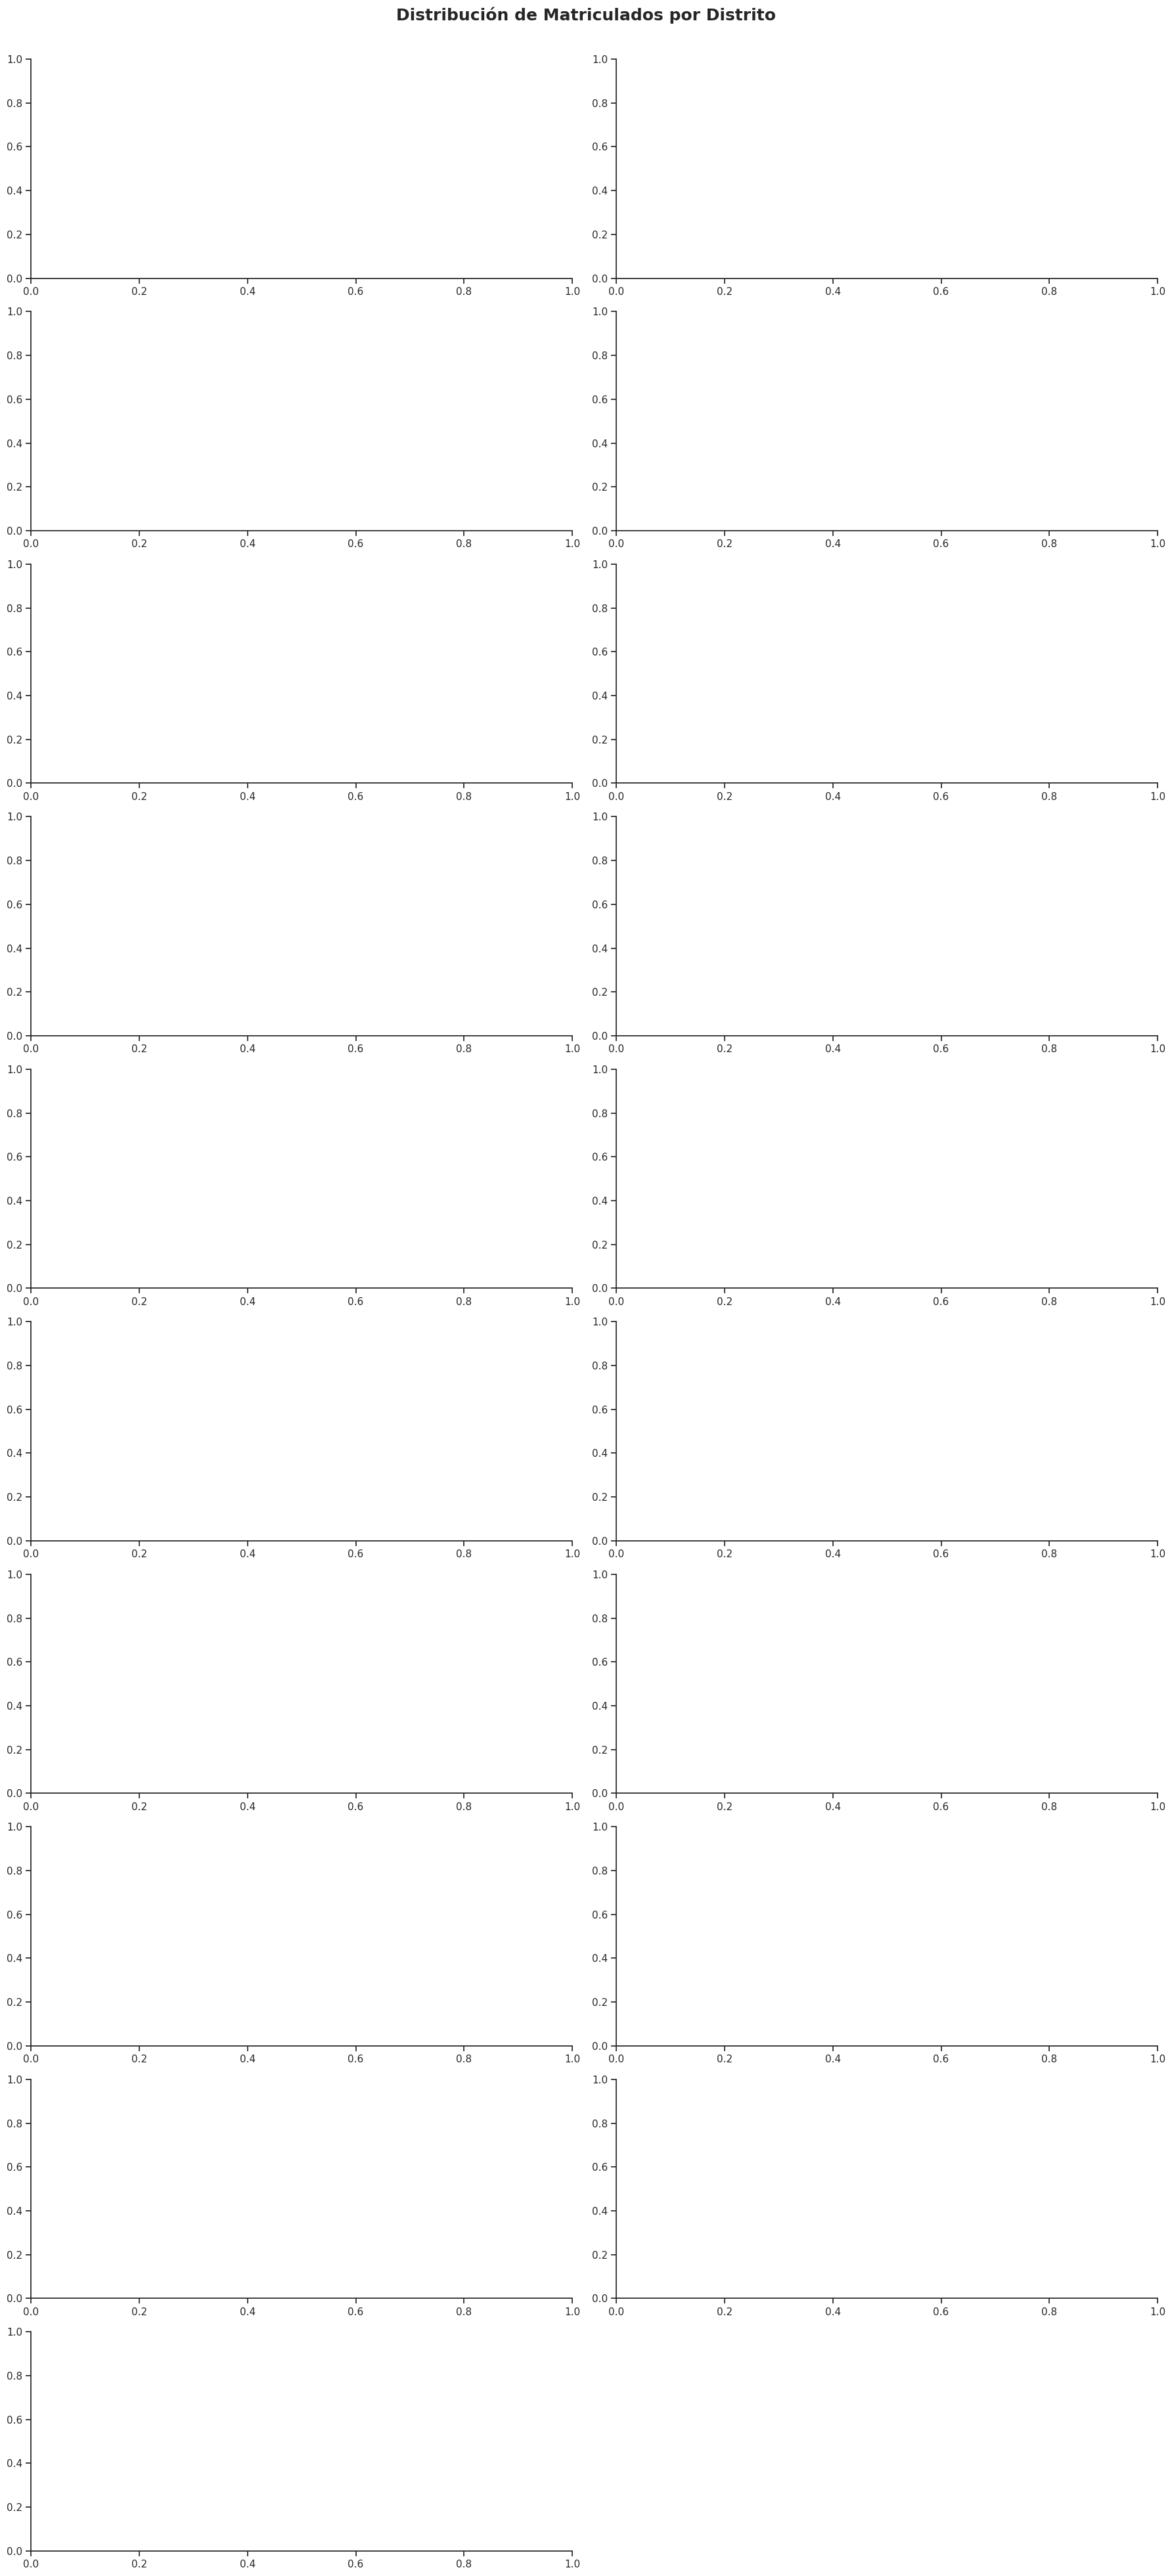

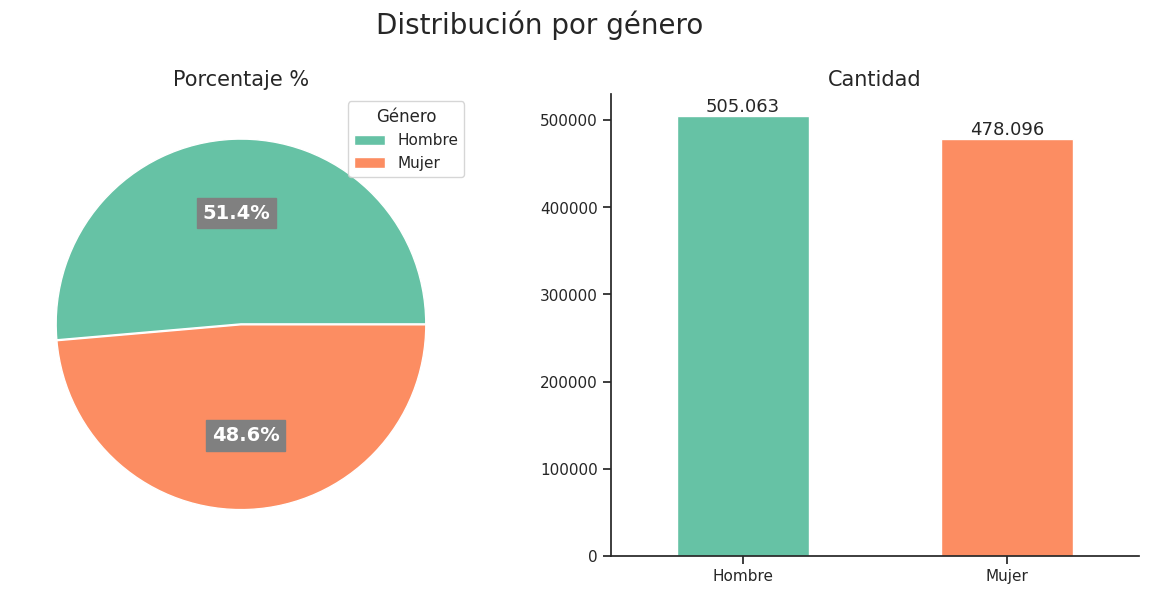

In [13]:
#Obtenemos la cantidad total por genero
df_genero = df.agg({'total_matriculados_hombre':'sum', 'total_matriculados_mujer':'sum'})

# Establecemos la sesión como no-interactiva.
plt.ioff()

# Creamos la figura contenedora.
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Establecemos el super-titulo.
fig.suptitle('Distribución por género', size=20, y=1.02)

# Establecemos los colores
colors = sns.color_palette("Set2")

# Diagramamos los datos con el grafico de pastel (Grafico 1)
graf1 = df_genero.plot(kind='pie', 
               ax=axes[0], 
               title='Porcentaje %',
               colors=colors,
               shadow=False,
               autopct = '%0.1f%%',
               labels = None,
               explode = [0.005, 0],
               textprops={'fontsize': 14, 
                           'color': 'white', 
                           'backgroundcolor': 'gray',
                           'weight':'bold'})

# Estilo titulo grafico 1
graf1.title.set_size(15)

#Desactivamos el y-axis
graf1.axes.get_yaxis().set_visible(False)

# Diagramamos los datos según cantidad (Grafico 2)
graf2 = df_genero.plot(kind='bar', 
                       color=colors,
                       title='Cantidad')

# Estilo titulo grafico 1
graf2.title.set_size(15)

# Reenombramos los xticks
graf2.set_xticklabels(['Hombre', 'Mujer'], rotation=0)

# Establecemos los labels
graf2.bar_label(graf2.containers[0], fontsize = 13, labels = [f'{x:,.0f}'.replace(',', '.') for x in graf2.containers[0].datavalues])


# Agregamos las leyendas
leg_graf = axes[0].legend(['Hombre', 'Mujer'], loc="best", title='Género')

# Mostramos el gráfico.
plt.show()

<h5>OBJETIVO 5: (RICH)</h6>
Representar la distribución de matriculados en la educación escolar básica por grado.

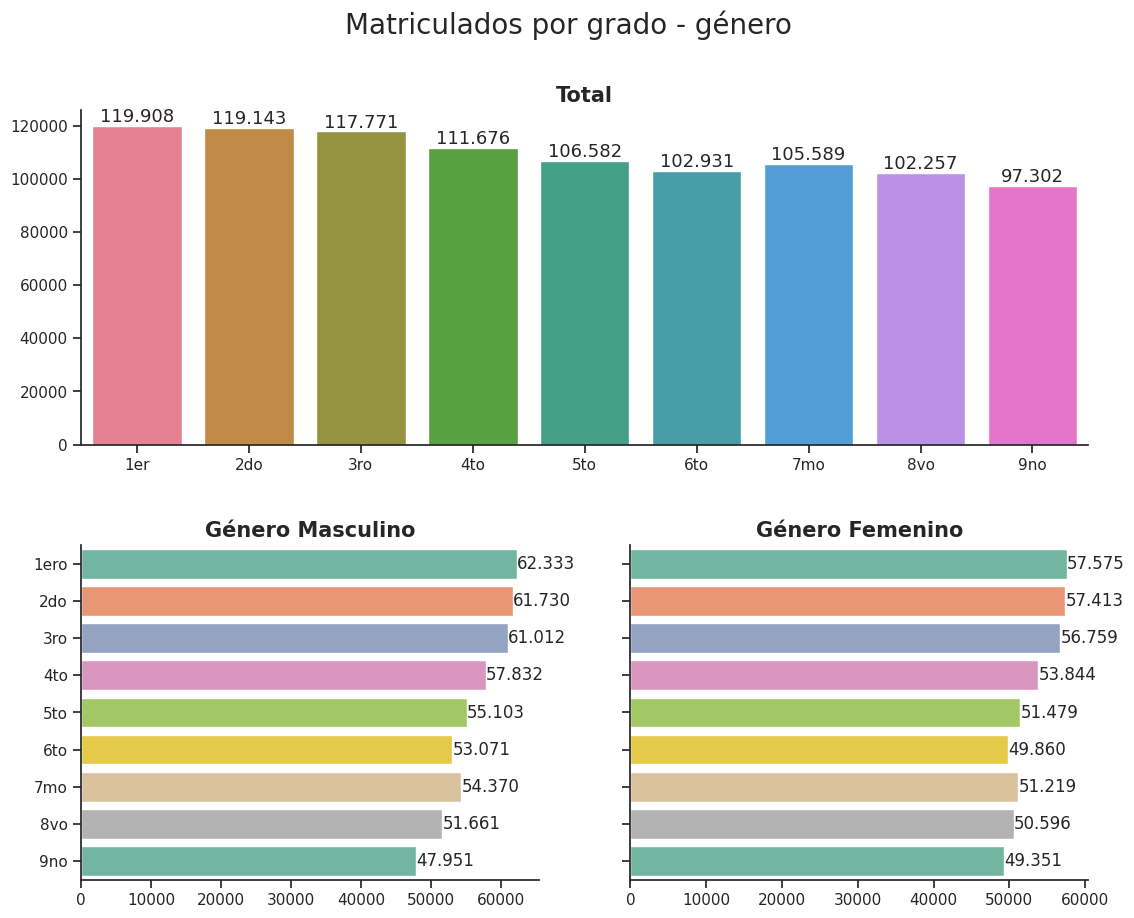

In [14]:
# Función para renombrar los campos
def change_name_columns(df, a, b):
    name = list(df.loc[:, a:b])
    df = df.rename(columns={name[0]: "1ero", 
                            name[1]: "2do",
                            name[2]: "3ro",
                            name[3]: "4to",
                            name[4]: "5to",
                            name[5]: "6to",
                            name[6]: "7mo",
                            name[7]: "8vo",
                            name[8]: "9no"})
    return df


# Obtener los indices de las columnas
lista_hombres = [x for x in range(12, 28+1) if x % 2 == 0]
lista_mujeres = [x for x in range(13, 29+1) if x % 2 != 0]

# Obtener el resumen por grado: género masculino
df_aux_men = df.iloc[:, lista_hombres].reset_index(level=0).drop(columns='departamento')
df_aux_men = change_name_columns(df_aux_men, 'primer_grado_hombre', 'noveno_grado_hombre')
df_aux_men = df_aux_men.sum().to_frame().reset_index(level=0).rename(columns={'index':'tipo', 0:"cantidad"})

# Obtener el resumen por grado: género femenino
df_aux_women = df.iloc[:, lista_mujeres].reset_index(level=0).drop(columns='departamento')
df_aux_women = change_name_columns(df_aux_women, 'primer_grado_mujer', 'noveno_grado_mujer')
df_aux_women = df_aux_women.sum().to_frame().reset_index(level=0).rename(columns={'index':'tipo', 0:"cantidad"})

# Obtener el resumen total por grado
total = df_aux_men.add(df_aux_women, fill_value=0)
total['tipo'] = total['tipo'].str.slice(0, 3)

# Establecemos la sesión como no-interactiva.
plt.ioff()

# Creamos la figura contenedora.
tamanho_grilla = (2, 2)
fig = plt.figure(figsize=(13,10))
axes = []

# Establecemos los subgráficos 
axes.append(plt.subplot2grid(tamanho_grilla, (0,0), colspan=2, rowspan=1))
axes.append(plt.subplot2grid(tamanho_grilla, (1,0), colspan=1, rowspan=1))
axes.append(plt.subplot2grid(tamanho_grilla, (1,1), colspan=1, rowspan=1))

# Ajustamos el espacio entre los subgraficos
fig.subplots_adjust(hspace=0.3)

# Ayuda a aplicar más espacios entre los graficos
#fig.tight_layout()

# Establecemos el super-titulo.
fig.suptitle('Matriculados por grado - género', size=20)

# Establecemos la paleta de colores
colores = sns.color_palette("husl", 9)
colores2 = sns.color_palette("Set2")
colores3 = sns.color_palette("Set2")

# Diagramamos el gráfico de barras 1.
graf_3 = sns.barplot(x='tipo', y='cantidad', data = total, errorbar = None, ax=axes[0], palette=colores)
graf_3 = axes[0].set_title('Total', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
graf_3 = axes[0].bar_label(axes[0].containers[0], fontsize = 13, labels = [f'{x:,.0f}'.replace(',', '.') for x in axes[0].containers[0].datavalues])

# Diagramamos el gráfico de barras 2.
graf_4 = sns.barplot(y='tipo', x='cantidad', data = df_aux_men, errorbar = None, ax=axes[1], palette=colores2)
graf_4 = axes[1].set_title('Género Masculino', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
graf_4 = axes[1].bar_label(axes[1].containers[0], fontsize = 12, labels = [f'{x:,.0f}'.replace(',', '.') for x in axes[1].containers[0].datavalues])

# Diagramamos el gráfico de barras 3.
graf_5 = sns.barplot(y='tipo', x='cantidad', data = df_aux_women, errorbar = None, ax=axes[2], palette=colores3)
graf_5 = axes[2].set_title('Género Femenino', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
graf_5 = axes[2].bar_label(axes[2].containers[0], fontsize = 12, labels = [f'{x:,.0f}'.replace(',', '.') for x in axes[2].containers[0].datavalues])

# Desactivamos el y-tick ya que comparte con el gráfico de la izquierda
plt.setp(axes[2].get_yticklabels(), visible=False)

# Eliminar el y-label and x-label
graf_3 = axes[0].set_ylabel(None) 
graf_3 = axes[0].set_xlabel(None)

graf_4 = axes[1].set_ylabel(None) 
graf_4 = axes[1].set_xlabel(None)

graf_5 = axes[2].set_ylabel(None) 
graf_5 = axes[2].set_xlabel(None)

# Mostramos el gráfico.
plt.show()

<h5>OBJETIVO 6: (EDE)</h6>
Plasmar gráficamente la distribución de matriculados en la educación escolar básica por ciclo (primer ciclo, segundo ciclo, tercer ciclo).

In [15]:
#general_format = {'figure.figsize':(12, 7), 'grid.linestyle': '--', 'axes.spines.right': False, 'axes.spines.top': False}
#sns.set_theme(style='ticks', rc = general_format)
					
'''
Agregamos columnas nuevas sumando:
    - primer_ciclo: primer al tercer grado
    - segundo_ciclo: cuarto al sexto grado
    - tercer_ciclo: septimo al noveno grado
'''
df_ciclos = df
df_ciclos['total_primer_ciclo'] = df['primer_grado_hombre'] + df['primer_grado_mujer'] + df['segundo_grado_hombre'] + df['segundo_grado_mujer'] + df['tercer_grado_hombre'] + df['tercer_grado_mujer']
df_ciclos['total_segundo_ciclo'] = df['cuarto_grado_hombre'] + df['cuarto_grado_mujer'] + df['quinto_grado_hombre'] + df['quinto_grado_mujer'] + df['sexto_grado_hombre'] + df['sexto_grado_mujer']
df_ciclos['total_tercer_ciclo'] = df['septimo_grado_hombre'] + df['septimo_grado_mujer'] + df['octavo_grado_hombre'] + df['octavo_grado_mujer'] + df['noveno_grado_hombre'] + df['noveno_grado_mujer']

#Agrupamos por departamento y obtenemos el total de matriculados por cada uno de los ciclos
df_ciclos = df.groupby(['departamento']).agg({'total_primer_ciclo':'sum', 'total_segundo_ciclo':'sum', 'total_tercer_ciclo':'sum'})

#Exportamos a csv
df_ciclos.to_csv('data/resumen_ciclos_total.csv', encoding = 'utf-8-sig')

#df_ciclos = df_ciclos.reset_index()
df_ciclos.head()


,total_primer_ciclo,total_segundo_ciclo,total_tercer_ciclo
departamento,,,
Alto Paraguay,1508,1144,867
Alto Paraná,48095,40928,38645
Amambay,10403,8628,6657
Boqueron,5085,4377,2946
Caaguazú,27092,24548,24576


<h5>OBJETIVO 7: (RICH)</h6>
Obtener un top de instituciones con mayor cantidad de matriculados a nivel país.

<h5>OBJETIVO 8: (EDE)</h6>
Elaborar un top de instituciones con mayor cantidad de matriculados por departamento.

In [16]:
#general_format = {'figure.figsize':(12, 7), 'grid.linestyle': '--', 'axes.spines.right': False, 'axes.spines.top': False}
#sns.set_theme(style='ticks', rc = general_format)

#Copiamos los datos en una variable
df_datos = df

#Removemos el indice 'departamento' para posteriormente establecer 'departamento' e 'institucion' como nuevos indices
df_datos = df_datos.reset_index()
df_datos = df_datos.set_index(['departamento','institucion'])

#Agrupamos los datos y ordenamos el 'total_matriculados' de mayor a menor
df_top_departamento_institucion = df_datos.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('total_matriculados', ascending=False))

#Agrupamos nuevamento para obtener el top 3 instituciones de cada departamento
df_top_departamento_institucion = df_top_departamento_institucion.groupby(level=0).head(3)[['total_matriculados']]

#Exportamos a csv
df_top_departamento_institucion.to_csv('data/resumen_top_departamento_institucion_total.csv', encoding = 'utf-8-sig')



<h5>OBJETIVO 9: (EDE)</h6>
Producir un top de instituciones con mayor cantidad de matriculados por zona.

In [17]:
#general_format = {'figure.figsize':(12, 7), 'grid.linestyle': '--', 'axes.spines.right': False, 'axes.spines.top': False}
#sns.set_theme(style='ticks', rc = general_format)

#Copiamos los datos en una variable
df_datos = df

#Removemos el indice 'departamento' para posteriormente establecer 'zona' e 'institucion' como nuevos indices
df_datos = df_datos.reset_index()
df_datos = df_datos.set_index(['zona','institucion'])

#Agrupamos los datos y ordenamos el 'total_matriculados' de mayor a menor
df_top_zona_institucion = df_datos.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('total_matriculados', ascending=False))

#Agrupamos nuevamento para obtener el top 10 instituciones de cada departamento
df_top_zona_institucion = df_top_zona_institucion.groupby(level=0).head(10)[['departamento', 'distrito', 'total_matriculados']]

#Exportamos a csv
df_top_zona_institucion.to_csv('data/resumen_top_zona_institucion_total.csv', encoding = 'utf-8-sig')